In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mm = MinMaxScaler()

In [2]:
PATH = 'C:/Users/skh01/Downloads/Expanded_data_with_more_features.csv/Expanded_data_with_more_features.csv'

In [3]:
study = pd.read_csv(PATH)
stu = study.copy()

In [4]:
stu.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#NaN데이터 처리

In [5]:
stu.TransportMeans=stu.TransportMeans.fillna('walk')
stu.TestPrep = stu.TestPrep.fillna('none')
stu.WklyStudyHours = stu.WklyStudyHours.fillna('0')
stu['IsFirstChild'] = stu['IsFirstChild'].fillna('no')
stu.PracticeSport = stu.PracticeSport.fillna('no')
stu.NrSiblings = stu.NrSiblings.fillna(0.0)

In [6]:
stu.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep                  0
ParentMaritalStatus    1190
PracticeSport             0
IsFirstChild              0
NrSiblings                0
TransportMeans            0
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
stu.dropna(inplace=True)

In [8]:
stu['TestPrep'] = stu['TestPrep'].replace({'completed': 1, 'none': 0})
stu['LunchType'] = stu['TestPrep'].replace({'free/reduced': 1, 'standard': 0})
stu['TransportMeans'] = stu['TestPrep'].replace({'private': 1, 'school_bus': 0})

stu['TestPrep'] = stu['TestPrep'].astype('category')
stu['LunchType'] = stu['TestPrep'].astype('category')
stu['TransportMeans'] = stu['TestPrep'].astype('category')

0과 1로 변환

In [9]:
stu.replace(
    {'EthnicGroup':
     {
      'group A':0,
      'group B':1,
      'group C':2,
      'group D':3,
      'group E':4
      },
      'IsFirstChild':
      {
        'yes':0,
        'no':1
      },
      'ParentMaritalStatus':
      { #결혼 이외 = 1
        'single':0,
        'widowed':0,
        'married':1,
        'divorced':0
      },
      'WklyStudyHours':
      { #5시간 이상 = 1
        '< 5':0,
        '5 - 10':1,
        '> 10':1
      },
      'Gender':
      {
        'female':0,
        'male':1
      }
      },
            inplace=True)

원-핫 인코딩

In [10]:
stu = pd.get_dummies(stu,columns=['ParentEduc', 'PracticeSport'])


TotalMeans 변수 생성

In [ ]:
stu['TotalMeans'] = (stu['MathScore'].astype('int')+stu['ReadingScore'].astype('int')+stu['WritingScore'].astype('int'))/3
stu.drop(['Unnamed: 0'],axis=1,inplace=True)

<AxesSubplot:>

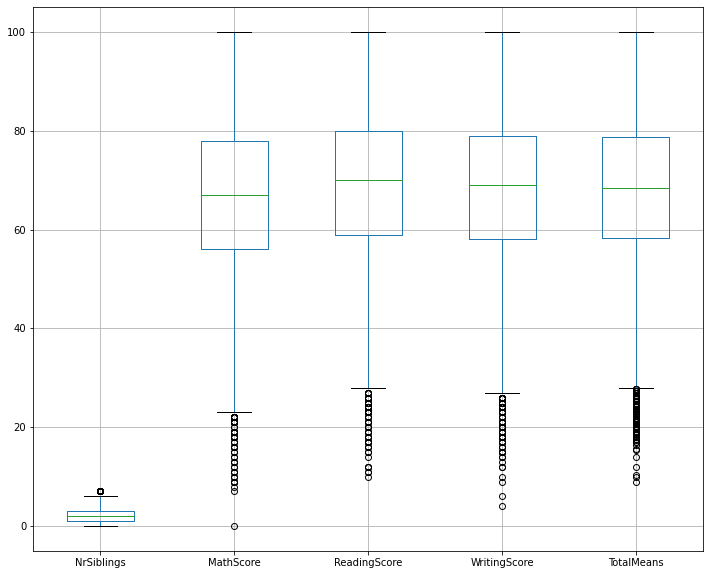

In [13]:
import matplotlib.pyplot as plt
stu2 = stu[['NrSiblings',
       'MathScore', 'ReadingScore', 'WritingScore',
       'TotalMeans'
       ]]
stu2.boxplot(figsize=(12, 10))

In [14]:
stu.columns

Index(['Gender', 'EthnicGroup', 'LunchType', 'TestPrep', 'ParentMaritalStatus',
       'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours',
       'MathScore', 'ReadingScore', 'WritingScore',
       'ParentEduc_associate's degree', 'ParentEduc_bachelor's degree',
       'ParentEduc_high school', 'ParentEduc_master's degree',
       'ParentEduc_some college', 'ParentEduc_some high school',
       'PracticeSport_never', 'PracticeSport_no', 'PracticeSport_regularly',
       'PracticeSport_sometimes', 'TotalMeans'],
      dtype='object')

In [20]:
y = stu[['WritingScore']] 

X = stu[['Gender',  'TestPrep', 
       'TransportMeans', "ParentEduc_bachelor's degree",
       'ParentEduc_high school', "ParentEduc_master's degree",
       'ParentEduc_some high school',
       'PracticeSport_never']]


Z = stu[['Gender',  'TestPrep', 
       'TransportMeans', "ParentEduc_bachelor's degree",
       'ParentEduc_high school', "ParentEduc_master's degree",
       'ParentEduc_some high school','WritingScore',
       'PracticeSport_never']]

In [16]:
#변수 간 상관관계 확인하기 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
corr = Z.corr()

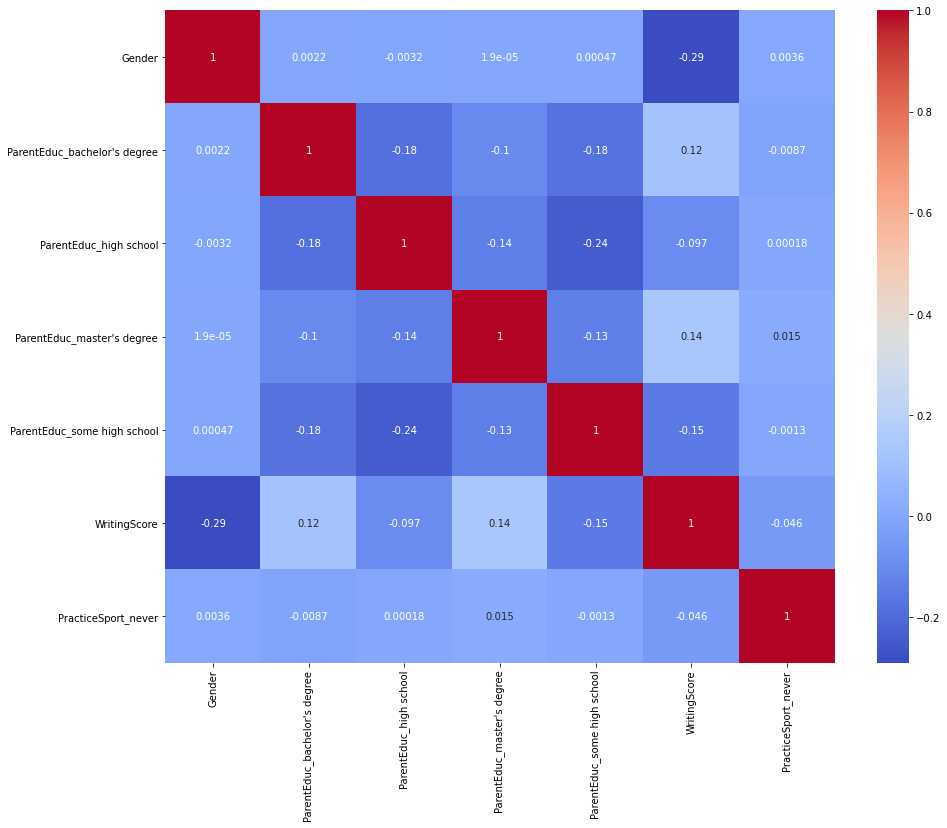

In [23]:
#히트맵 그리기 
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax )
plt.show()

In [32]:
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=50) 

In [34]:
X_test = scaler.transform(X_test)

In [35]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=3000)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)  

r2_score(y_test, pred)

<ipython-input-35-bbfd59a3b3ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


0.2231727708686171

#XGBoost

In [36]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(learning_rate=0.3, n_estimators=50000)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
#성능측정 
pred = xgb_model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.22300522751976282

LightGBM

In [39]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()

In [40]:
lgb_model.fit(X_train, y_train)

c:\Users\skh01\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor()

In [42]:
pred = lgb_model.predict(X_test)
r2_score(y_test, pred)


0.22300570674699494

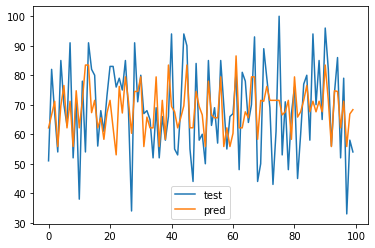

In [43]:
plt.plot(y_test.to_numpy()[:100], label='test')
plt.plot(pred[:100], label='pred')
plt.legend()